<a href="https://colab.research.google.com/github/utk468/animal_classification/blob/main/Animaleclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
iamsouravbanerjee_animal_image_dataset_90_different_animals_path = kagglehub.dataset_download('iamsouravbanerjee/animal-image-dataset-90-different-animals')

print('Data source import complete.')


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,BatchNormalization



In [ ]:
data_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2,  # 80-20 train-test split
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",  # Use 80% for training
    shuffle=True,
)


val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",  # Use 20% for validation
)

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


In [ ]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(90, activation='softmax')
])

In [ ]:
base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)


loss, accuracy = model.evaluate(val_generator)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 77s 548ms/step - accuracy: 0.9554 - loss: 0.3304 - val_accuracy: 0.6176 - val_loss: 1.9557 - learning_rate: 2.5000e-04
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 76s 544ms/step - accuracy: 0.9706 - loss: 0.2340 - val_accuracy: 0.6759 - val_loss: 1.6664 - learning_rate: 2.5000e-04
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 77s 545ms/step - accuracy: 0.9777 - loss: 0.1963 - val_accuracy: 0.6806 - val_loss: 1.5848 - learning_rate: 2.5000e-04
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 78s 553ms/step - accuracy: 0.9764 - loss: 0.1782 - val_accuracy: 0.7259 - val_loss: 1.3969 - learning_rate: 2.5000e-04
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 77s 550ms/step - accuracy: 0.9839 - loss: 0.1605 - val_accuracy: 0.7343 - val_loss: 1.2840 - learning_rate: 2.5000e-04
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 76s 539ms/step - accuracy: 0.9853 - loss: 0.1348 - val_accuracy: 0.7380 - val_loss: 1.2504 - learning_rate: 2.5000e-04
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 77s 54

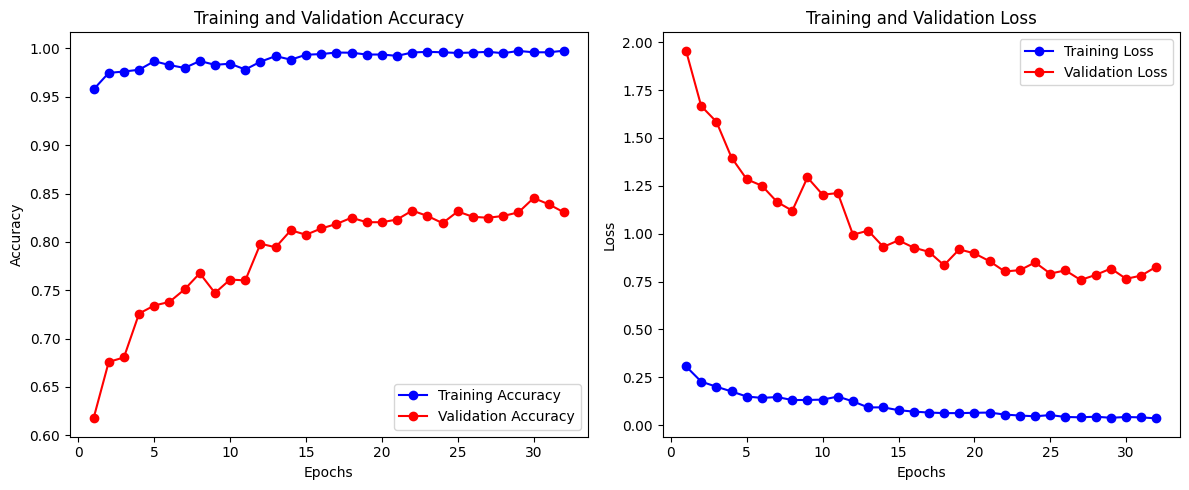

In [ ]:
import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()